In [6]:
import pandas as pd 
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [40]:
metadata = pd.read_csv("../Project-Disney-World-DSF/metadata.csv")
hauntedhouse = pd.read_csv("../Project-Disney-World-DSF/haunted_mansion[87].csv")

#metadataa
#metadataa["INSESSION"]
# -> wo sind alle anderen insession columns?!!!!!


**Preparing Haunted House Data**

In [8]:
#compute percentage of na-values per column; result: 96.59% of actual waiting times are na
hauntedhouse.isna().mean()

#extract and drop SACTMIN column from Df
act_times = hauntedhouse.copy()["SACTMIN"]
hauntedhouse = hauntedhouse.drop(["SACTMIN"], axis=1)
hauntedhouse.shape

(319956, 3)

In [9]:
#format column date
hauntedhouse['date'] = pd.to_datetime(hauntedhouse['date'])
#format column datetime
hauntedhouse['datetime'] = pd.to_datetime(hauntedhouse['datetime'])


Handling Missing Data in Haunted House

In [10]:
#missing values are coded as -999; dataset does NOT include observations during covid-19 closure time
#imputation with ...

hauntedhouse.loc[hauntedhouse['SPOSTMIN'] == -999,'SPOSTMIN'] = np.nan
hauntedhouse["SPOSTMIN"] = hauntedhouse["SPOSTMIN"].fillna(method='bfill')
hauntedhouse["SPOSTMIN"] = hauntedhouse["SPOSTMIN"].fillna(hauntedhouse["SPOSTMIN"].median())
                
hauntedhouse    

,date,datetime,SPOSTMIN
0,2015-01-01,2015-01-01 08:23:09,10.0
1,2015-01-01,2015-01-01 08:37:13,10.0
2,2015-01-01,2015-01-01 08:37:31,10.0
3,2015-01-01,2015-01-01 08:44:11,10.0
4,2015-01-01,2015-01-01 08:51:12,10.0
...,...,...,...
319951,2021-12-28,2021-12-28 22:36:08,13.0
319952,2021-12-28,2021-12-28 22:42:15,13.0
319953,2021-12-28,2021-12-28 22:48:12,13.0
319954,2021-12-28,2021-12-28 22:54:10,13.0


**Preparing Metadata**

In [11]:
#looking at percentage of na-values per column
metadata.isna().sum().sort_values(ascending=False).head(20)
metadata.shape

(2079, 181)

In [12]:
#remove variables related to Hollywood Studios Park in California (and not Walt Disney World in Florida)
metadata.columns.str.startswith('HS').sum() 
metadata.columns.str.endswith('_HS').sum() 

metadata = metadata.loc[:, ~metadata.columns.str.startswith('HS')]
metadata = metadata.loc[:, ~metadata.columns.str.endswith('_HS')]

metadata.shape
# -> Wieso sind die Summen Null aber 40 columns werden entfernt? 

(2079, 145)

In [13]:
nan_cols85 = [i for i in metadata.columns if metadata[i].isnull().sum() > 1*len(metadata)]
nan_cols85
# -> es hat keine columns mit nur NA values, wie kommt sie denn auf 6???

[]

In [14]:
#filter out columns with all na-values
metadata.dropna(axis=1, how='all', inplace=True) #-> 6

#format date
metadata['DATE'] = pd.to_datetime(metadata['DATE'])


metadata.shape

(2079, 141)

In [15]:
#function that deals with string percentage values for columns that contain percentage of schools in session
def str_percent_to_float(dataframe):
    for col in dataframe.columns:
        if col.lower().startswith('insession'):
            dataframe[col] = dataframe[col].str.rstrip("%").astype(float)/100
            
str_percent_to_float(metadata)
metadata

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,MKFIREN,EPFIREWK,EPFIRET1,EPFIRET2,EPFIREN,AKPRDDAY,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
1,2015-01-02,NaN,6,1,0,1,2015,CHRISTMAS,2,5,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
2,2015-01-03,NaN,7,2,0,1,2015,CHRISTMAS,3,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
3,2015-01-04,NaN,1,3,1,1,2015,CHRISTMAS,4,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
4,2015-01-05,NaN,2,4,1,1,2015,CHRISTMAS,5,0,...,Wishes Nighttime Spectacular,1,21:00,NaN,IllumiNations: Reflections of Earth,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,NaN,6,238,34,8,2021,NaN,11,0,...,Happily Ever After,1,22:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN
2075,2021-08-28,NaN,7,239,34,8,2021,NaN,10,0,...,Happily Ever After,1,22:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN
2076,2021-08-29,NaN,1,240,35,8,2021,NaN,9,0,...,Happily Ever After,1,22:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN
2077,2021-08-30,NaN,2,241,35,8,2021,NaN,8,0,...,Happily Ever After,1,21:00,NaN,Epcot Forever,0,0,NaN,NaN,NaN


In [16]:
metadata.filter(like="INSESSION")
# -> wo sind alle anderen insession columns?

,INSESSION_PLANES
0,0.00
1,0.00
2,0.00
3,0.48
4,0.48
...,...
2074,NaN
2075,NaN
2076,NaN
2077,NaN


In [17]:
metadata["INSESSION_WDW"]

KeyError: 'INSESSION_WDW'

In [19]:
#function that deals with string times of form '9:00' or '25:00'; converts to hours since midnight (float) for consistency and usability
sww = ["MKOPEN", "MKCLOSE", "MKEMHOPEN", "MKEMHCLOSE", "MKOPENYEST", "MKCLOSEYEST", "MKOPENTOM", "MKCLOSETOM", "EPOPEN", "EPCLOSE", "EPEMHOPEN",
"EPEMHCLOSE", "EPOPENYEST", "EPCLOSEYEST", "EPOPENTOM", "EPCLOSETOM", "AKOPEN", "AKCLOSE", "AKEMHOPEN", "AKEMHCLOSE", "AKOPENYEST", "AKCLOSEYEST",
"AKOPENTOM", "AKCLOSETOM", "MKPRDDT1", "MKPRDDT2", "MKPRDNT1", "MKPRDNT2", "MKFIRET1", "MKFIRET2", "EPFIRET1", "EPFIRET2", "AKSHWNT1", "AKSHWNT2"]

for col in sww:
    metadata[col].fillna("99", inplace=True)  #to indicate outliers

metadata["MKCLOSE"][0]
# -> wieso EPOPEN etc. noch drin? Epcot, sollte nicht rausnehmen?
# -> wie cols in sww ausgewählt?

'25:00'

In [20]:
def format_times(x):
    if len(x)==4:
        time = '0'+ x
    elif len(x)==5 and x > '24:00':
        hour = int(x[:2])-24
        minute = x[-2:]
        time = '0' + str(hour) + ':' + minute
    elif x == '24:00':
        time = '00:00'
    else:
        time = x
    return time

def str_times_to_numerical(dataframe):
    for col in sww:
        dataframe[col] = dataframe[col].apply(format_times)
        dataframe[col] = dataframe[col].apply(lambda y: y.rstrip(':'))
        dataframe[col] = dataframe[col].apply(lambda x: (float(x[:2])+(float(x[-2:])/60)) if x[0] != 0 else (float(x[1])+(float(x[-2:])/60)))

str_times_to_numerical(metadata)


In [22]:
#function for filling missing values
def imputation(dataframe):
        for col in dataframe.columns:
                dataframe[col] = dataframe[col].fillna(method='bfill')
                dataframe[col] = dataframe[col].fillna(dataframe[col].median())
        return dataframe

In [23]:
#one-hot encoding of categorical features
categorical_features = ["WDW_TICKET_SEASON", "SEASON", "HOLIDAYN", "WDWTICKETSEASON", "WDWRaceN", "WDWeventN", "WDWSEASON", "MKeventN", "EPeventN", "AKeventN", "HOLIDAYJ", "MKPRDDN", "MKPRDNN", "MKFIREN", "EPFIREN", "AKSHWNN"]

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough')

transformed = transformer.fit_transform(metadata)
encoded_metadata = pd.DataFrame(transformed, columns=transformer.get_feature_names())
#new name of columns for i encoded column: 'onehotencoder__xi_oldcategoryname'

encoded_metadata.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(2079, 277)

Merge datasets

In [25]:
#change name of "DATE" column in metadata to fit with Haunted House 
encoded_metadata.rename(columns={"DATE":"date"}, inplace=True)

In [28]:
#merge metadata and waiting time data 
waittimes = pd.merge(hauntedhouse, encoded_metadata, how='left', on='date')

In [30]:
# brauchte noch diese Linie, dass funktioniert für mich (Annina)
waittimes["datetime"] = pd.to_datetime(waittimes.datetime, format = '%Y-%m-%d %H:%M:%S')

In [31]:
#Formatting of dates and times 
#drop date column due to redundancy
waittimes = waittimes.loc[:, waittimes.columns != "date"]

#create two new variables for hour and minute (day, month and year already included)
waittimes["HOUROFDAY"] = waittimes.copy()['datetime'].dt.hour
waittimes["MINUTEOFHOUR"] = waittimes.copy()['datetime'].dt.minute
#then drop datetime column
waittimes = waittimes.loc[:, waittimes.columns != 'datetime']


Feature Selection

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

In [33]:
waittimes = imputation(waittimes)
#dauert ewig.... 6min

In [34]:
type(waittimes)

pandas.core.frame.DataFrame

In [ ]:
X = waittimes.loc[:, waittimes.columns != "SPOSTMIN"]
y = np.array(waittimes["SPOSTMIN"])
X.shape, y.shape

((319956, 278), (319956,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Random Forest
#does not accept NaN?
rf = RandomForestClassifier(n_estimators=10, max_depth=50, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RMSE: " + str(round(sqrt(mean_squared_error(y_test, y_pred)), 2)))
print("R_squared: " + str(round(r2_score(y_test, y_pred), 2)))

RMSE: 10.67
R_squared: 0.68


Regression (OLS)

In [66]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [53]:
columns_list = list(waittimes.columns)
columns_list.remove("SPOSTMIN")

In [65]:
x = waittimes[columns_list]
y = waittimes['SPOSTMIN']

ols = LinearRegression() 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)


In [60]:
ols.fit(x_test, y_test)
y_predols= ols.predict(x_test)

r2 = ols.score(x_test, y_test)
r2

0.22035345250552385

In [69]:
print(metrics.mean_absolute_error(y_test, y_predols))
print(metrics.mean_squared_error(y_test, y_predols))

16.4378901723318
423.83775309839996


ValueError: x and y must be the same size

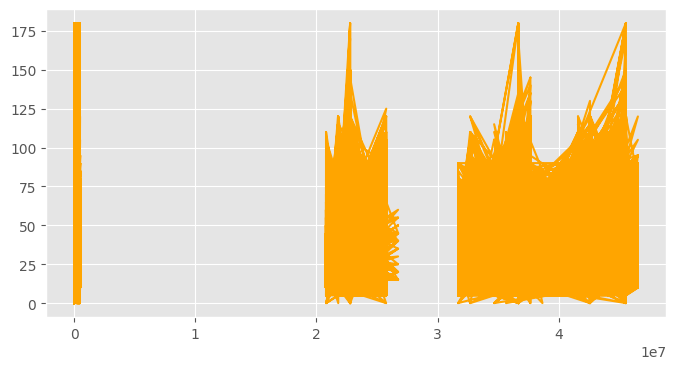

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_test, y_test, color='orange', label='Regression model')
ax.scatter(x_test, y_test, edgecolor='k', facecolor='blue', alpha=0.7, label='Sample data')
ax.set_ylabel('waiting time', fontsize=14)
ax.set_xlabel('Features', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Disney Wold Wait time prediction' % r2, fontsize=18)